# Homework Assignment 3 by Raymond Daley

This is the initail copy of code from Chapter 4

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[2]])

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

1) Change the model to use one hidden (aka "representation") layer, and see how this affects validation and test accuracy.  Show this by plotting them (on the same plot, like in the book).  Repeat this for three hidden layers.  Comment on any differences you find, as well as what you'd expect.
## Part 1

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [9]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-10-10 16:40:35.473362: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 1s 27ms/step - loss: 0.4915 - accuracy: 0.8063 - val_loss: 0.3840 - val_accuracy: 0.8734
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3130 - accuracy: 0.9034 - val_loss: 0.3173 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2435 - accuracy: 0.9245 - val_loss: 0.2883 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2007 - accuracy: 0.9381 - val_loss: 0.3032 - val_accuracy: 0.8755
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1712 - accuracy: 0.9463 - val_loss: 0.2728 - val_accuracy: 0.8918
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1468 - accuracy: 0.9563 - val_loss: 0.2812 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1286 - accuracy: 0.9633 - val_loss: 0.2799 - val_accuracy: 0.8876
Epoch 8/20
30/30 [==========

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<class 'list'>


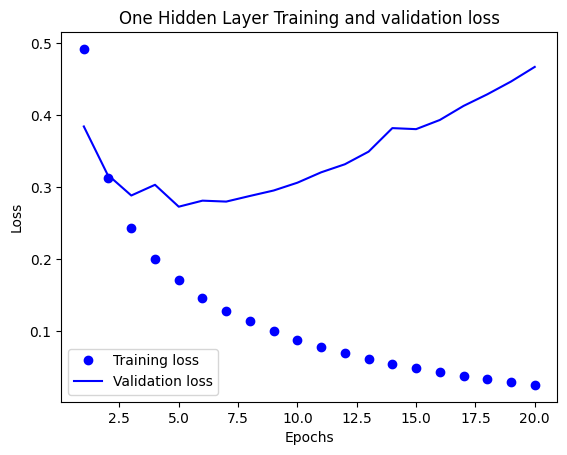

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
print(type(loss_values))
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("One Hidden Layer Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

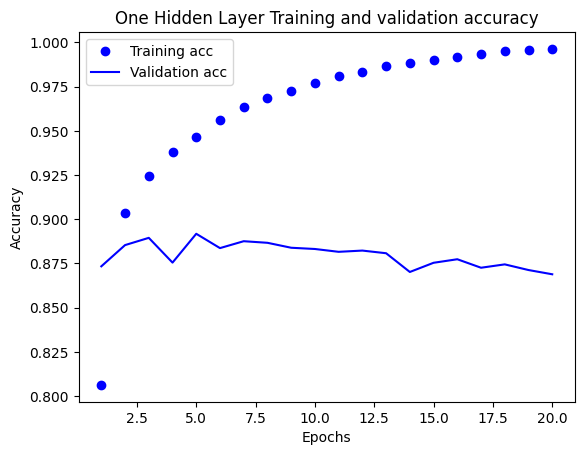

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("One Hidden Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Part 2 

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [16]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 14ms/step - loss: 0.5536 - accuracy: 0.7619 - val_loss: 0.4111 - val_accuracy: 0.8715
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3245 - accuracy: 0.9005 - val_loss: 0.3127 - val_accuracy: 0.8847
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2255 - accuracy: 0.9289 - val_loss: 0.2850 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1728 - accuracy: 0.9427 - val_loss: 0.2823 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1350 - accuracy: 0.9580 - val_loss: 0.2875 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1045 - accuracy: 0.9689 - val_loss: 0.3867 - val_accuracy: 0.8585
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0833 - accuracy: 0.9760 - val_loss: 0.3948 - val_accuracy: 0.8670
Epoch 8/20
30/30 

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<class 'list'>


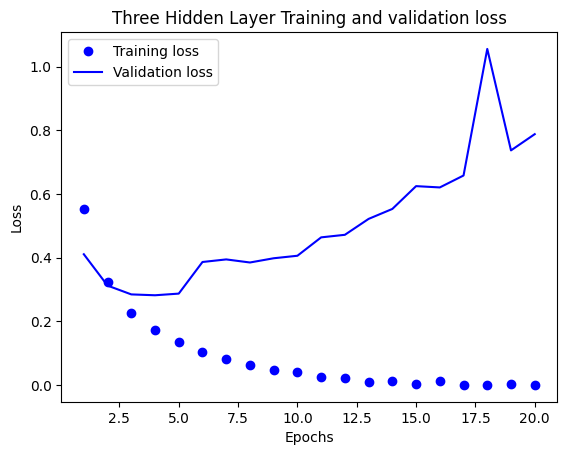

In [19]:
history_dict = history.history
loss_values = history_dict["loss"]
print(type(loss_values))
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Three Hidden Layer Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

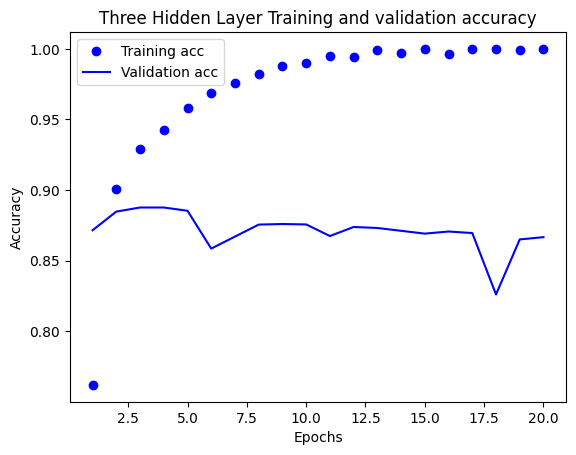

In [20]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Three Hidden Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

2) Try changing the number of nodes in the hidden layers to 100.  See how this affects validation and test accuracy.  Show this by plotting them (on the same plot, like in the book). 
## Part 1

In [21]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [22]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4589 - accuracy: 0.7937 - val_loss: 0.3192 - val_accuracy: 0.8803
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2585 - accuracy: 0.9062 - val_loss: 0.2828 - val_accuracy: 0.8886
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1884 - accuracy: 0.9359 - val_loss: 0.2730 - val_accuracy: 0.8938
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1477 - accuracy: 0.9491 - val_loss: 0.2814 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1237 - accuracy: 0.9585 - val_loss: 0.3104 - val_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0996 - accuracy: 0.9681 - val_loss: 0.3111 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0777 - accuracy: 0.9773 - val_loss: 0.4080 - val_accuracy: 0.8596
Epoch 8/20
30

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<class 'list'>


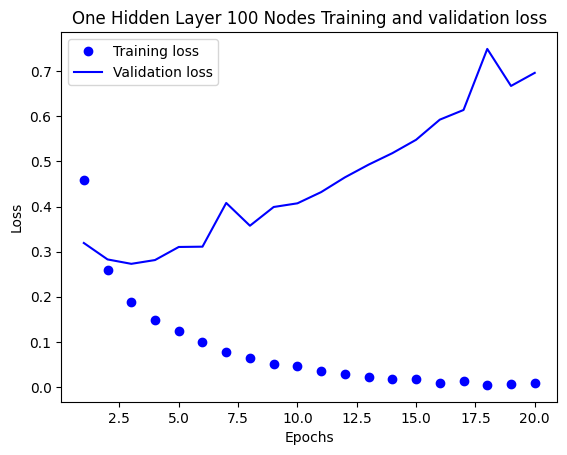

In [25]:

history_dict = history.history
loss_values = history_dict["loss"]
print(type(loss_values))
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("One Hidden Layer 100 Nodes Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

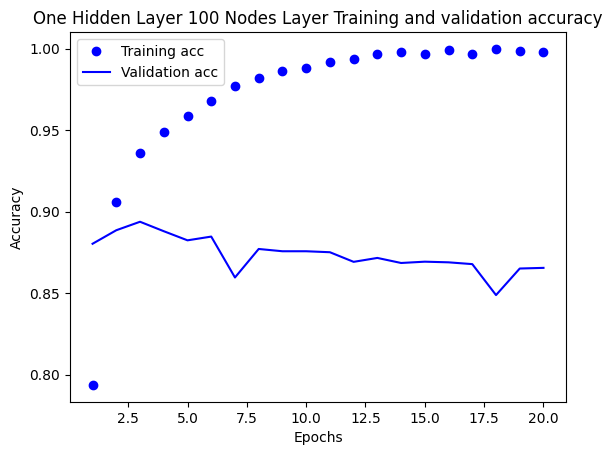

In [26]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("One Hidden Layer 100 Nodes Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Part 2

In [27]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [28]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5521 - accuracy: 0.7708 - val_loss: 0.4128 - val_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3281 - accuracy: 0.8964 - val_loss: 0.3107 - val_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2268 - accuracy: 0.9280 - val_loss: 0.3367 - val_accuracy: 0.8609
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1737 - accuracy: 0.9450 - val_loss: 0.2992 - val_accuracy: 0.8794
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1401 - accuracy: 0.9551 - val_loss: 0.3115 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1091 - accuracy: 0.9663 - val_loss: 0.3304 - val_accuracy: 0.8794
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0915 - accuracy: 0.9711 - val_loss: 0.3326 - val_accuracy: 0.8829
Epoch 8/20
30/3

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<class 'list'>


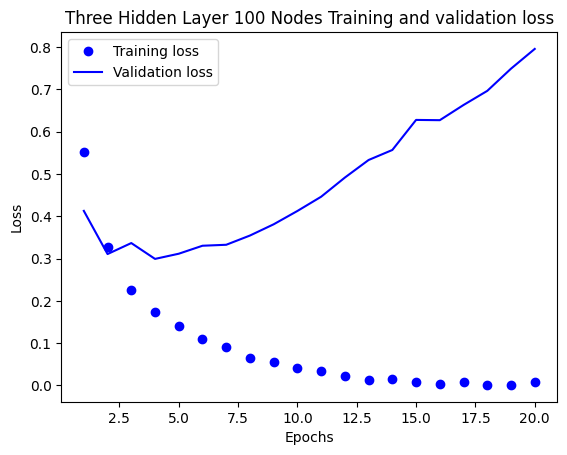

In [31]:

history_dict = history.history
loss_values = history_dict["loss"]
print(type(loss_values))
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Three Hidden Layer 100 Nodes Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

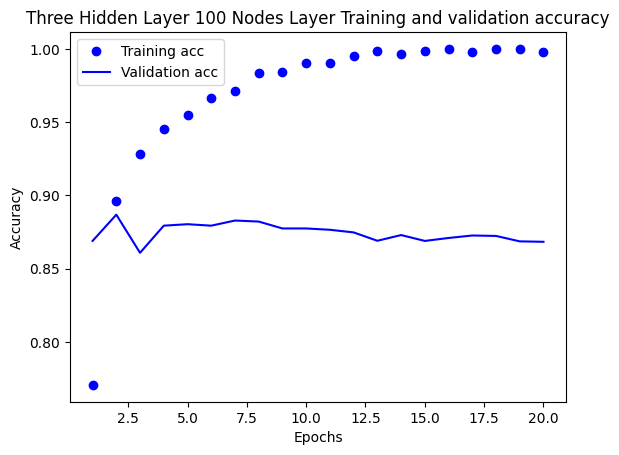

In [32]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Three Hidden Layer 100 Nodes Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

3) Evaluate the test accuracy of the model before any training has taken place.  Compare this to the accuracy post-training, and comment on whether or not this is what you'd expect.

## Part 1(a): One Hidden Layer 16 Nodes Pre Training    

In [33]:
pretraining_data = []
posttraining_data = []
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
part_1_a = model.evaluate(x_test, y_test)
pretraining_data.append(part_1_a[1])
print (part_1_a)

782/782 [==============================] - 1s 738us/step - loss: 0.6955 - accuracy: 0.5011
[0.6955227255821228, 0.5010799765586853]


782/782 [==============================] - 0s 546us/step


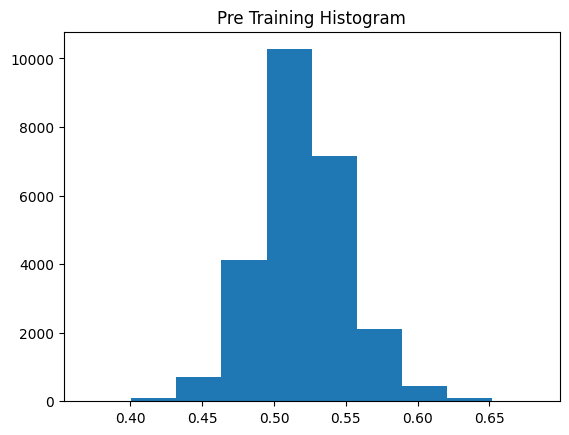

In [34]:
pre_prediction = model.predict(x_test)
plt.hist(pre_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram');

## Part 1(b): One Hidden Layer 16 Nodes After Training

In [35]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
part_1_b = model.evaluate(x_test, y_test)
posttraining_data.append(part_1_b[1])
print(part_1_b)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4428 - accuracy: 0.8320
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2748 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2198 - accuracy: 0.9255
Epoch 4/4
782/782 [==============================] - 1s 689us/step - loss: 0.2833 - accuracy: 0.8863
[0.2833358943462372, 0.8863199949264526]


782/782 [==============================] - 0s 556us/step


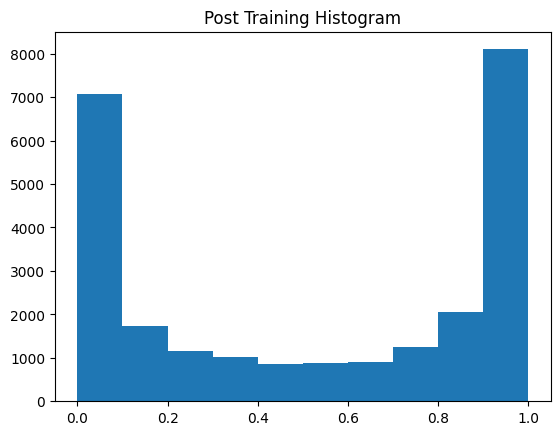

In [36]:
post_prediction = model.predict(x_test)
plt.hist(post_prediction, bins=10)
plt.gca().set(title='Post Training Histogram');

## Part 2(a): Three Hidden Layers 16 Nodes Pre Training

In [37]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
part_2_a = model.evaluate(x_test, y_test)
pretraining_data.append(part_2_a[1])
print (part_2_a)

782/782 [==============================] - 1s 673us/step - loss: 0.6957 - accuracy: 0.4868
[0.6957413554191589, 0.4867999851703644]


782/782 [==============================] - 0s 583us/step


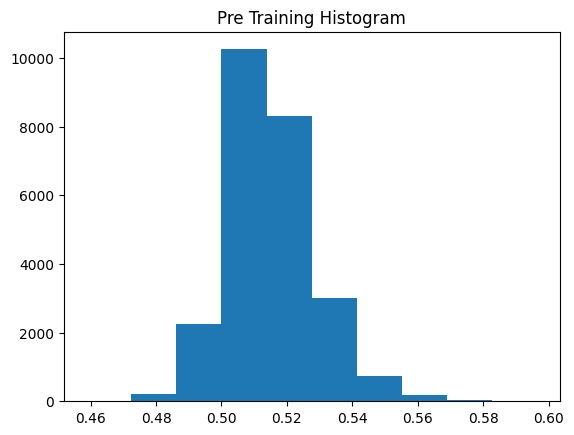

In [38]:
pre_prediction = model.predict(x_test)
plt.hist(pre_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram')

## Part 2(b): Three Hidden Layers 16 Nodes After Training

In [44]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
part_2_b = model.evaluate(x_test, y_test)
posttraining_data.append(part_2_b[1])
print(part_2_b)

Epoch 1/4
49/49 [==============================] - 1s 22ms/step - loss: 0.0655 - accuracy: 0.9777
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.0600 - accuracy: 0.9834
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.0082 - accuracy: 0.9982
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.7159 - accuracy: 0.8707
[0.7159156799316406, 0.8707200288772583]


782/782 [==============================] - 1s 1ms/step


[Text(0.5, 1.0, 'Pre Training Histogram')]

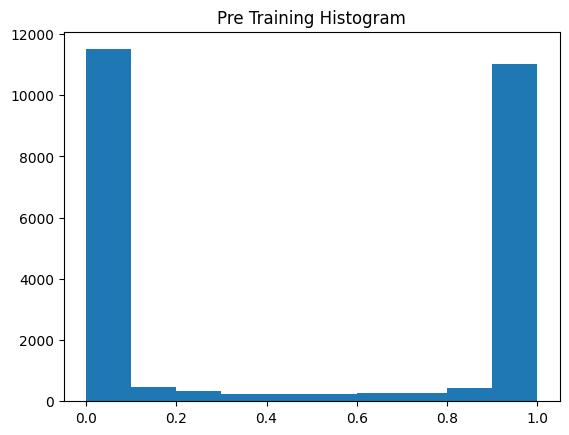

In [45]:
post_prediction = model.predict(x_test)
plt.hist(post_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram')

## Part 3(a): One Hidden Layer 1000 Nodes Pre Training

In [46]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
part_3_a = model.evaluate(x_test, y_test)
pretraining_data.append(part_3_a[1])
print (part_3_a)

782/782 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5193
[0.6921026706695557, 0.5192800164222717]


782/782 [==============================] - 1s 1ms/step


[Text(0.5, 1.0, 'Pre Training Histogram')]

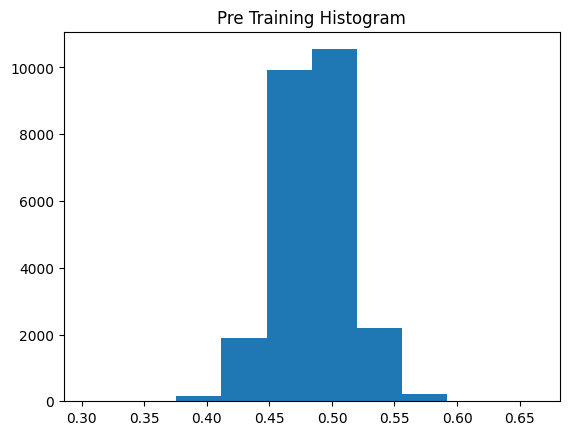

In [47]:
pre_prediction = model.predict(x_test)
plt.hist(pre_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram')

## Part 3(b): One Hidden Layer 1000 Nodes After Training

In [48]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
part_3_b = model.evaluate(x_test, y_test)
posttraining_data.append(part_3_b[1])
print(part_3_b)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4046 - accuracy: 0.8277
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2368 - accuracy: 0.9128
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.1847 - accuracy: 0.9318
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3061 - accuracy: 0.8799
[0.3060572147369385, 0.8798800110816956]


782/782 [==============================] - 1s 1ms/step


[Text(0.5, 1.0, 'Pre Training Histogram')]

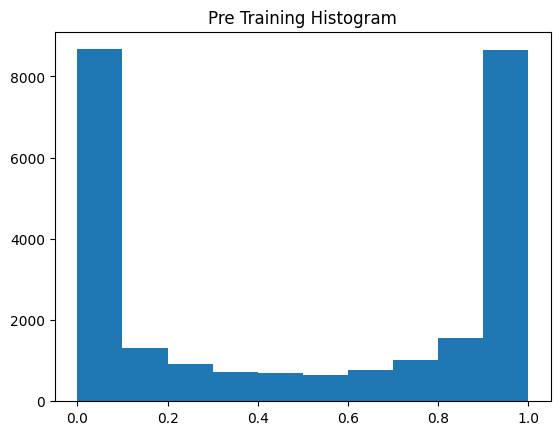

In [49]:
post_prediction = model.predict(x_test)
plt.hist(post_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram')

## Part 4(a): Three Hidden Layers 1000 Nodes Pre Training

In [50]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
part_4_a = model.evaluate(x_test, y_test)
pretraining_data.append(part_4_a[1])
print (part_4_a)

782/782 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5117
[0.6931997537612915, 0.511680006980896]


782/782 [==============================] - 1s 1ms/step


[Text(0.5, 1.0, 'Pre Training Histogram')]

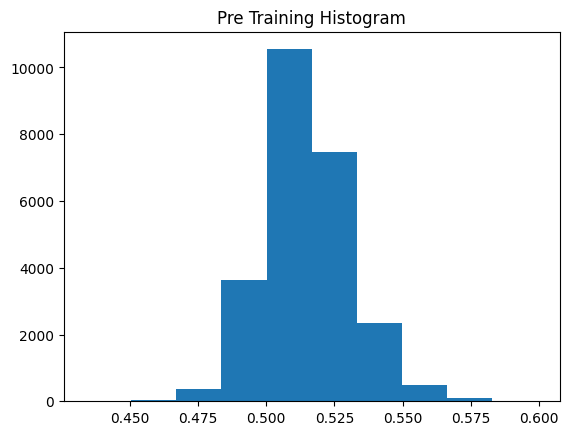

In [51]:
pre_prediction = model.predict(x_test)
plt.hist(pre_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram')

## Part 4(b): Three Hidden Layers 1000 Nodes After Training

In [52]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
part_4_b = model.evaluate(x_test, y_test)
posttraining_data.append(part_4_b[1])
print(part_4_b)

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.4364 - accuracy: 0.8000
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2314 - accuracy: 0.9091
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.1685 - accuracy: 0.9328
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3981 - accuracy: 0.8711
[0.3981011211872101, 0.8711199760437012]


782/782 [==============================] - 1s 1ms/step


[Text(0.5, 1.0, 'Pre Training Histogram')]

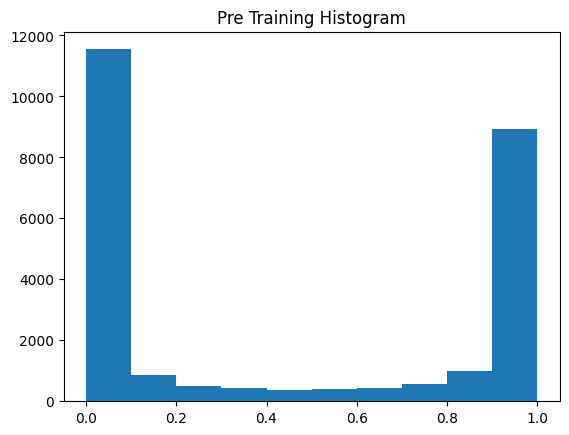

In [53]:
post_prediction = model.predict(x_test)
plt.hist(post_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram')